In [0]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
from scipy import *
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import *
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import *
from sklearn.metrics import *
import matplotlib.pyplot as plt
import seaborn as sns

In [535]:
df_data=pd.read_csv("/content/model_data.csv")
df_data.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [536]:
df_data.shape

(614, 13)

In [537]:
df_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [538]:
df_data['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [539]:
#Checking if Loan ID has all unique values , and thus can be removed 
len(df_data['Loan_ID'].unique())

614

In [540]:
#Saving the Loan ID in the sequence of application in another dataframe
df_id= df_data['Loan_ID']
#Dropping Loan ID from Featureset
df_data=df_data.drop(columns='Loan_ID')
df_data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [541]:
#continous column
num_cols = df_data._get_numeric_data().columns
cont_cols = []
for i in num_cols:
  if(len(df_data[i].unique())) > int(df_data.shape[0]/25):
     cont_cols.append(i)
print (cont_cols) 

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']


In [542]:
#categorical column
cat_cols = list(set(df_data.columns) - set(cont_cols))
cat_cols

['Loan_Amount_Term',
 'Loan_Status',
 'Gender',
 'Property_Area',
 'Credit_History',
 'Self_Employed',
 'Education',
 'Dependents',
 'Married']

**Outlier Handling.**

In [543]:
#Identifiying outliers with skewness.
for i in cont_cols:
  print(str(i)+' : '+str(df_data[i].skew()))


ApplicantIncome : 6.539513113994625
CoapplicantIncome : 7.491531216657306
LoanAmount : 2.677551679256059


In [544]:
#Using Quantile flooring  at 10% & 90%
for i in cont_cols:
  #Defning the lower & upper cap/cutoff
  lower_cutoff = df_data[i].quantile(0.1)
  upper_cutoff = df_data[i].quantile(0.90)
  #Replacing the Outliers from both ends with capped cutoffs
  df_data[i] = np.where(df_data[i] < lower_cutoff,lower_cutoff,df_data[i])
  df_data[i] = np.where(df_data[i] > upper_cutoff, upper_cutoff,df_data[i])
  print('Revised skew after Outlier handling '+str(i)+' : '+str(df_data[i].skew()))


Revised skew after Outlier handling ApplicantIncome : 1.0177280847006973
Revised skew after Outlier handling CoapplicantIncome : 0.5184989987479341
Revised skew after Outlier handling LoanAmount : 0.6317364370380842


**Missing Values Imputation**

In [545]:
#Mode value for every field
df_data.mode().iloc[0]

Gender                    Male
Married                    Yes
Dependents                   0
Education             Graduate
Self_Employed               No
ApplicantIncome         2216.1
CoapplicantIncome            0
LoanAmount                  71
Loan_Amount_Term           360
Credit_History               1
Property_Area        Semiurban
Loan_Status                  Y
Name: 0, dtype: object

In [546]:
#Categorical Columns with missing values
df_data[cat_cols].isnull().sum()

Loan_Amount_Term    14
Loan_Status          0
Gender              13
Property_Area        0
Credit_History      50
Self_Employed       32
Education            0
Dependents          15
Married              3
dtype: int64

In [0]:
#Catogarical with mode
for cols in cat_cols:
  if ( df_data[cols].isnull().sum() > 0):
    df_data[cols] = df_data[cols].fillna(df_data[cols].mode().iloc[0])

In [548]:
#Checking for missing values after applying Mode imputation
df_data[cat_cols].isnull().sum()

Loan_Amount_Term    0
Loan_Status         0
Gender              0
Property_Area       0
Credit_History      0
Self_Employed       0
Education           0
Dependents          0
Married             0
dtype: int64

In [549]:
#Handling  missing values in continuous column with median.
df_data.median()

ApplicantIncome      3812.5
CoapplicantIncome    1188.5
LoanAmount            128.0
Loan_Amount_Term      360.0
Credit_History          1.0
dtype: float64

In [550]:
#Check which of continous columns have missing value
df_data[cont_cols].isnull().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
dtype: int64

In [0]:
#Continous with Median
for cols in cont_cols:
  if ( df_data[cols].isnull().sum() > 0):
    df_data[cols] = df_data[cols].fillna(df_data[cols].median())

In [552]:
#Checking for missing values after applying Median imputation
df_data[cont_cols].isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
dtype: int64

**Use Label Encoder as encoding technique on features.**

In [553]:
df_data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [554]:
le = LabelEncoder()
target = pd.DataFrame(le.fit_transform(df_data['Loan_Status']))
target.columns = (['Loan_Status'])
target.head()

,Loan_Status
0,1
1,0
2,1
3,1
4,1


In [555]:
print(target['Loan_Status'].value_counts())
lbl_1,lbl_0 = target['Loan_Status'].value_counts()
print("Label 1 class %age: "+str((lbl_1*100)/target['Loan_Status'].count()))
print("Label 0 class %age: "+str((lbl_0*100)/target['Loan_Status'].count()))

1    422
0    192
Name: Loan_Status, dtype: int64
Label 1 class %age: 68.72964169381108
Label 0 class %age: 31.270358306188925


In [556]:
df_data=df_data.drop(columns='Loan_Status')
df_data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [0]:
df_le = df_data.copy()

In [558]:
cat_cols = list(set(cat_cols) - set(['Loan_Status']))
cat_cols

['Loan_Amount_Term',
 'Gender',
 'Property_Area',
 'Credit_History',
 'Self_Employed',
 'Education',
 'Dependents',
 'Married']

In [559]:
for j in cat_cols :
  df_le['enc_'+str(j)] = le.fit_transform(df_le[j])
df_data_le = df_le.drop(columns = cat_cols)
df_data_le.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,enc_Loan_Amount_Term,enc_Gender,enc_Property_Area,enc_Credit_History,enc_Self_Employed,enc_Education,enc_Dependents,enc_Married
0,5849.0,0.0,128.0,8,1,2,1,0,0,0,0
1,4583.0,1508.0,128.0,8,1,0,1,0,0,1,1
2,3000.0,0.0,71.0,8,1,2,1,1,0,0,1
3,2583.0,2358.0,120.0,8,1,2,1,0,1,0,1
4,6000.0,0.0,141.0,8,1,2,1,0,0,0,0


In [560]:
df_data.shape

(614, 11)

In [0]:
#Test-Train split
x_train, x_test, y_train, y_test = train_test_split(df_data_le, target, test_size=0.25, random_state=42 , stratify=
                                                    target)

In [562]:
print("Train Feature set:\t"+str(len(x_train)))
print("Train Label Feature set:\t"+str(len(y_train)))
print("Test Feature set:\t"+str(len(x_test)))
print("Test label set:\t"+str(len(y_test)))

Train Feature set:	460
Train Label Feature set:	460
Test Feature set:	154
Test label set:	154


In [563]:
#Stratified Sampling
print("For Training Data :")
print(y_train['Loan_Status'].value_counts())
lbl_1,lbl_0 = y_train['Loan_Status'].value_counts()
print("Label 1 class %age: "+str((lbl_1*100)/y_train['Loan_Status'].count()))
print("Label 0 class %age: "+str((lbl_0*100)/y_train['Loan_Status'].count()))
print("\nFor Test Set :")
print(y_test['Loan_Status'].value_counts())
lbl_1,lbl_0 = y_test['Loan_Status'].value_counts()
print("Label 1 class %age: "+str((lbl_1*100)/y_test['Loan_Status'].count()))
print("Label 0 class %age: "+str((lbl_0*100)/y_test['Loan_Status'].count()))

For Training Data :
1    316
0    144
Name: Loan_Status, dtype: int64
Label 1 class %age: 68.69565217391305
Label 0 class %age: 31.304347826086957

For Test Set :
1    106
0     48
Name: Loan_Status, dtype: int64
Label 1 class %age: 68.83116883116882
Label 0 class %age: 31.16883116883117


1.Using Logistic Regression - Perform the parameter tuning and list your best performance metrics on -

Precision ,Recall & F1 Score ,AUROC. 

In [573]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression(random_state=55)
lr_model.fit(x_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=55, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [574]:
y_pred=lr_model.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [575]:
#Using logiistic_regression without Gridsearch
print("----Parameter tuning without GridSearch-----")
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred))
print("Accuracy of lr Model:")
print(accuracy_score(y_test, y_pred))
print("Precision of lr Model:")
print (precision_score(y_test, y_pred))
print ("Recall of lr Model:" )
print( recall_score(y_test, y_pred))
print ("F1 Score of lr Model:")
print (f1_score(y_test, y_pred))

----Parameter tuning without GridSearch-----
Confusion Matrix
[[ 27  21]
 [  1 105]]
Accuracy of lr Model:
0.8571428571428571
Precision of lr Model:
0.8333333333333334
Recall of lr Model:
0.9905660377358491
F1 Score of lr Model:
0.9051724137931034


In [576]:
roc_auc_score(y_test,y_pred)

0.7765330188679245

In [577]:
# parameter tuning with gridsearchCV.
clf_lr = LogisticRegression()
param_grid = {
   'random_state': [  10, 25,30, 50 ],
   'class_weight' : ['balanced'],
  'multi_class':["auto"]
  ,"solver":['newton-cg’, ‘lbfgs’, ‘liblinear', 'sag', 'saga']}
CV_lr = GridSearchCV(estimator=clf_lr, param_grid=param_grid, cv= 3)
CV_lr.fit(x_train, y_train)
clf_best_lr = CV_lr.best_estimator_
print(clf_best_lr)
y_pred= clf_best_lr.predict(x_test)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got newton-cg’, ‘lbfgs’, ‘liblinear.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expect

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=10, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],

In [579]:
#Using Gridsearch optimal parameter tuning
print("----Parameter tuning using GridSearch-----")
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred))
print("Accuracy of lr Model:")
print(accuracy_score(y_test, y_pred))
print("Precision of lr Model:")
print (precision_score(y_test, y_pred))
print ("Recall of lr Model:" )
print( recall_score(y_test, y_pred))
print ("F1 Score of lr Model:")
print (f1_score(y_test, y_pred))

----Parameter tuning using GridSearch-----
Confusion Matrix
[[22 26]
 [52 54]]
Accuracy of lr Model:
0.4935064935064935
Precision of lr Model:
0.675
Recall of lr Model:
0.5094339622641509
F1 Score of lr Model:
0.5806451612903226


In [580]:
roc_auc_score(y_test,y_pred)

0.48388364779874216

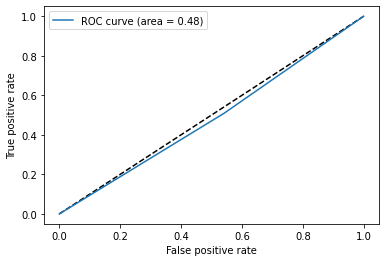

In [581]:
fpr, tpr, thresholds = roc_curve(y_test,y_pred)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)'% roc_auc_score(y_test,y_pred))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='best')

In [447]:
#random forest Classifier
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(random_state=55)
clf_rf.fit(x_train, y_train)
print(clf_rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=55, verbose=0,
                       warm_start=False)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [448]:
y_pred=clf_rf.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [449]:
#Using randomforest without Gridsearch
print("----Parameter tuning without GridSearch-----")
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred))
print("Accuracy of rf Model:")
print(accuracy_score(y_test, y_pred))
print("Precision of rf Model:")
print (precision_score(y_test, y_pred))
print ("Recall of rf Model:" )
print( recall_score(y_test, y_pred))
print ("F1 Score of rf Model:")
print (f1_score(y_test, y_pred))

----Parameter tuning without GridSearch-----
Confusion Matrix
[[ 30  18]
 [  6 100]]
Accuracy of rf Model:
0.8441558441558441
Precision of rf Model:
0.847457627118644
Recall of rf Model:
0.9433962264150944
F1 Score of rf Model:
0.8928571428571428


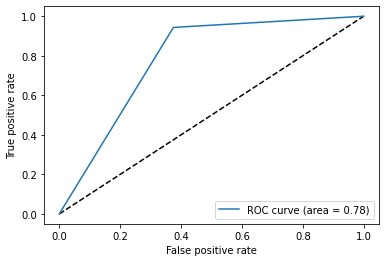

In [450]:
fpr, tpr, thresholds = roc_curve(y_test,y_pred)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)'% roc_auc_score(y_test,y_pred))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='best')

In [452]:
#Using GridSearch , find the optimal hyperparameters

clf_rf1 = RandomForestClassifier()
param_grid = {
   'n_estimators':list(range(10,101,10)),
   'max_features':['sqrt','log2'],
   'max_depth':[10,30,50,45],
   'criterion':['gini','entropy']}
CV_rf1 = GridSearchCV(estimator=clf_rf, param_grid=param_grid, cv= 5,verbose=0)
CV_rf1.fit(x_train, y_train)
clf_best_rf1 = CV_rf1.best_estimator_
print(clf_best_rf1)
y_pred = clf_best_rf1.predict(x_test)



/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=80,
                       n_jobs=None, oob_score=False, random_state=55, verbose=0,
                       warm_start=False)


In [453]:
print("----Parameter tuning using GridSearch-----")
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred))
print("Accuracy of regression Model:")
print(accuracy_score(y_test, y_pred))
print("Precision of regression Model:")
print (precision_score(y_test, y_pred))
print ("Recall of regression Model:" )
print( recall_score(y_test, y_pred))
print ("F1 Score of regression Model:")
print (f1_score(y_test, y_pred))

----Parameter tuning using GridSearch-----
Confusion Matrix
[[ 28  20]
 [  4 102]]
Accuracy of regression Model:
0.8441558441558441
Precision of regression Model:
0.8360655737704918
Recall of regression Model:
0.9622641509433962
F1 Score of regression Model:
0.8947368421052632


In [455]:
roc_auc_score(y_test,y_pred)

0.7727987421383647

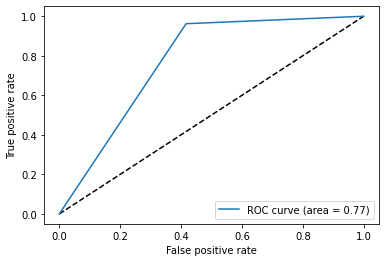

In [456]:
fpr, tpr, thresholds = roc_curve(y_test,y_pred)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)'% roc_auc_score(y_test,y_pred))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='best')

**Use One hot Encoder as encoding technique on feature **

In [0]:
df_ohe = df_data.copy()

In [457]:
cat_cols

['Loan_ID',
 'Loan_Amount_Term',
 'Gender',
 'Property_Area',
 'Credit_History',
 'Education',
 'Self_Employed',
 'Dependents',
 'Married']

In [306]:
df_ohe.shape

(614, 30)

3.Using Logistic Regression - Perform the parameter tuning and list your best performance metrics on -

Precision ,Recall & F1 Score ,AUROC

In [0]:
#spliting data
X_train, X_test, Y_train, Y_test = train_test_split(df_ohe, target, test_size=0.25, random_state=55 , stratify=target)

In [500]:
print("Train Feature set:\t"+str(len(X_train)))
print("Train Label Feature set:\t"+str(len(Y_train)))
print("Test Feature set:\t"+str(len(X_test)))
print("Test label set:\t"+str(len(Y_test)))

Train Feature set:	460
Train Label Feature set:	460
Test Feature set:	154
Test label set:	154


In [501]:
#Stratified Sampling
print("For Training Data :")
print(Y_train['Loan_Status'].value_counts())
lbl_1,lbl_0 = Y_train['Loan_Status'].value_counts()
print("Label 1 class %age: "+str((lbl_1*100)/Y_train['Loan_Status'].count()))
print("Label 0 class %age: "+str((lbl_0*100)/Y_train['Loan_Status'].count()))
print("\nFor Test Set :")
print(Y_test['Loan_Status'].value_counts())
lbl_1,lbl_0 = Y_test['Loan_Status'].value_counts()
print("Label 1 class %age: "+str((lbl_1*100)/Y_test['Loan_Status'].count()))
print("Label 0 class %age: "+str((lbl_0*100)/Y_test['Loan_Status'].count()))

For Training Data :
1    316
0    144
Name: Loan_Status, dtype: int64
Label 1 class %age: 68.69565217391305
Label 0 class %age: 31.304347826086957

For Test Set :
1    106
0     48
Name: Loan_Status, dtype: int64
Label 1 class %age: 68.83116883116882
Label 0 class %age: 31.16883116883117


In [529]:
from sklearn.linear_model import LogisticRegression
lr_ohe_model=LogisticRegression(random_state=55)
lr_ohe_model.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=55, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [530]:
y_pred = lr_ohe_model.predict(X_test)
y_pred

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [531]:
#Using lr without Gridsearch
print("----Parameter tuning without GridSearch-----")
print("Confusion Matrix")
print(confusion_matrix(Y_test,y_pred))
print("Accuracy of lr_ohe Model:")
print(accuracy_score(Y_test, y_pred))
print("Precision of lr_ohe Model:")
print (precision_score(Y_test, y_pred))
print ("Recall of lr_ohe Model:" )
print( recall_score(Y_test, y_pred))
print ("F1 Score of lr_ohe Model:")
print (f1_score(Y_test, y_pred))

----Parameter tuning without GridSearch-----
Confusion Matrix
[[ 21  27]
 [  4 102]]
Accuracy of lr_ohe Model:
0.7987012987012987
Precision of lr_ohe Model:
0.7906976744186046
Recall of lr_ohe Model:
0.9622641509433962
F1 Score of lr_ohe Model:
0.8680851063829786


In [532]:
# parameter tuning with gridsearchCV.
clf_lr_ohe = LogisticRegression()
param_grid = {
   'random_state': [  10, 20,30, 50 ],
   'class_weight' : ['balanced'],
  'multi_class':["auto"]
  ,"solver":['newton-cg’, ‘lbfgs’, ‘liblinear', 'sag', 'saga']}
CV_lr_ohe = GridSearchCV(estimator=clf_lr, param_grid=param_grid, cv= 3)
CV_lr_ohe.fit(X_train, Y_train)
clf_best_lr_ohe = CV_lr_ohe.best_estimator_
print(clf_best_lr_ohe)
y_pred= clf_best_lr_ohe.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got newton-cg’, ‘lbfgs’, ‘liblinear.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expect

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=10, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validat

In [528]:
print("----Parameter tuning using GridSearch-----")
print("Confusion Matrix")
print(confusion_matrix(Y_test,y_pred))
print("Accuracy of lr_ohe Model:")
print(accuracy_score(Y_test, y_pred))
print("Precision of lr_ohe Model:")
print (precision_score(Y_test, y_pred))
print ("Recall of lr_ohe Model:" )
print( recall_score(Y_test, y_pred))
print ("F1 Score of lr_ohe Model:")
print (f1_score(Y_test, y_pred))

----Parameter tuning using GridSearch-----
Confusion Matrix
[[ 48   0]
 [106   0]]
Accuracy of lr_ohe Model:
0.3116883116883117
Precision of lr_ohe Model:
0.0
Recall of lr_ohe Model:
0.0
F1 Score of lr_ohe Model:
0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [533]:
roc_auc_score(Y_test,y_pred)

0.5892295597484277

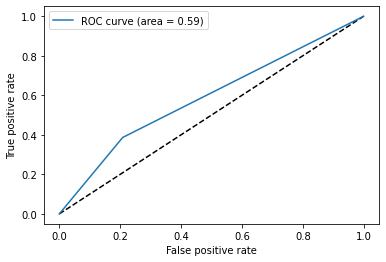

In [509]:
fpr, tpr, thresholds = roc_curve(Y_test,y_pred)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)'% roc_auc_score(Y_test,y_pred))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='best')

4.Using RandomForest Classifier - Perform the parameter tuning and list your best performance metrics on -

Precision ,Recall & F1 Score ,AUROC 

In [472]:
#random forest Classifier
from sklearn.ensemble import RandomForestClassifier
clf_rf1 = RandomForestClassifier(random_state=55)
clf_rf1.fit(X_train, Y_train)
print(clf_rf1)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=55, verbose=0,
                       warm_start=False)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [473]:
y_pred=clf_rf1.predict(X_test)
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0])

In [475]:
#Using lr without Gridsearch
print("----Parameter tuning without GridSearch-----")
print("Confusion Matrix")
print(confusion_matrix(Y_test,y_pred))
print("Accuracy of rf_ohe Model:")
print(accuracy_score(Y_test, y_pred))
print("Precision of rf_ohe Model:")
print (precision_score(Y_test, y_pred))
print ("Recall of rf_ohe Model:" )
print( recall_score(Y_test, y_pred))
print ("F1 Score of rf_ohe Model:")
print (f1_score(Y_test, y_pred))

----Parameter tuning without GridSearch-----
Confusion Matrix
[[22 16]
 [ 7 78]]
Accuracy of rf_ohe Model:
0.8130081300813008
Precision of rf_ohe Model:
0.8297872340425532
Recall of rf_ohe Model:
0.9176470588235294
F1 Score of rf_ohe Model:
0.871508379888268


In [477]:
clf_rf_ohe = RandomForestClassifier()
param_grid = {
   'n_estimators':list(range(10,101,10)),
   'max_features':['sqrt','log2'],
   'max_depth':[10,30,50,45],
   'criterion':['gini','entropy']}
CV_rf_ohe = GridSearchCV(estimator=clf_rf_ohe, param_grid=param_grid, cv= 5,verbose=0)
CV_rf_ohe.fit(X_train, Y_train)
clf_best_rf_ohe = CV_rf_ohe.best_estimator_
print(clf_best_rf_ohe)
y_pred = clf_best_rf_ohe.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=90,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [478]:
print("confusion matrix")
print(confusion_matrix(Y_test,y_pred))

confusion matrix
[[22 16]
 [ 4 81]]


In [479]:
print("Accuracy",accuracy_score(Y_test,y_pred))

Accuracy 0.8373983739837398


In [481]:
print("recall",recall_score(Y_test,y_pred))
print("precision",precision_score(Y_test,y_pred))
print("f1score",f1_score(Y_test,y_pred))

recall 0.9529411764705882
precision 0.8350515463917526
f1score 0.8901098901098902


In [482]:
roc_auc_score(Y_test,y_pred)

0.7659442724458203

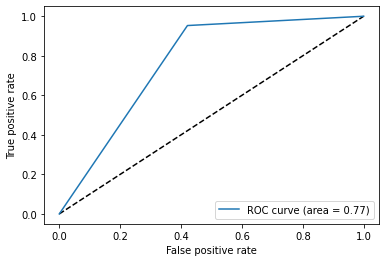

In [483]:
fpr, tpr, thresholds = roc_curve(Y_test,y_pred)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)'% roc_auc_score(Y_test,y_pred))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='best')

Which approach between Label Encoding & One Hot Encoding gave better results in case of both the algorithms used ?

In case of Logistic regression ,using label ecoding without any parameter tuning, is better than ohe but,after applying tuning the accuracy of logistic regrssion model get decreases.

And, In case of random forest, using label encoding with or without tuning  gives almost same result.but , in ohe after applying tuning the accuracy increases.